<a href="https://colab.research.google.com/github/markvasin/kaggle-quora-insincere-questions-classification/blob/master/Quora_Insincere_Questions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quora Insincere Questions Classification

https://www.kaggle.com/c/quora-insincere-questions-classification

###Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Data Exploration

##Loading Data

In [2]:
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/Advanced Machine Learning/Data/train.csv'
test_path = '/content/drive/My Drive/Colab Notebooks/Advanced Machine Learning/Data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
print('Train shape : ', train_df.shape)
print('Test shape : ', test_df.shape)

Train shape :  (1306122, 3)
Test shape :  (375806, 2)


In [5]:
"""
qid - unique question identifier
question_text - Quora question text
target - a question labeled "insincere" has a value of 1, otherwise 0
"""

train_df.sample(5)

,qid,question_text,target
264140,33b0bd3bbb035629e261,"Why was I told ""welcome back home"" when I retu...",0
245908,30182a2d78df567ae556,Is it sensible for European countries to ban b...,0
1187457,e8b277c5acc5bfe4f759,Can I get admission in Urdu (hons) with 49%?,0
240252,2eff87191a1c307639f4,What are some proverbs with meanings and examp...,0
458210,59bfee4f6aec7150f850,Does a police supervisor has to sign the polic...,0


##Target Distribution##

0 = Sincere Question

1 = Insincere Question

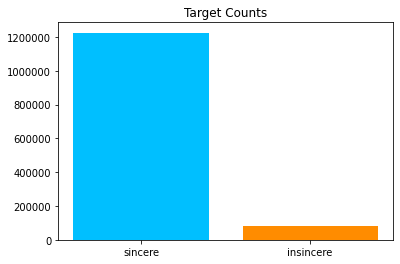

In [6]:
target_count = train_df['target'].value_counts()
targets = ['sincere', 'insincere']
plt.title('Target Counts')
plt.ticklabel_format(style='plain')
plt.bar(target_count.index, target_count.values, tick_label=targets, color = ['deepskyblue','darkorange'])
plt.show()

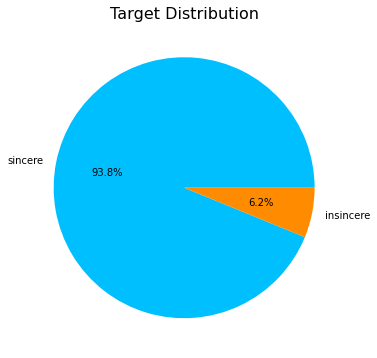

In [7]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.title('Target Distribution', fontsize=16)
plt.pie(target_count.values, labels=targets, autopct='%1.1f%%', colors=['deepskyblue','darkorange'])
plt.show()

##N Grams Visualisation

In [8]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
insincere_df = train_df[train_df['target']==1]
sincere_df = train_df[train_df['target']==0]

def get_ngram_df(texts, n=1):
  frequency = defaultdict(int)

  for text in texts:
    tokenized = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    n_grams = ngrams(tokenized, n)
    for words in n_grams:
      filter(None, words)
      words = ' '.join(words)
      frequency[words] += 1
      
  df = pd.DataFrame(sorted(frequency.items(), key=lambda x: x[1])[::-1])
  df.columns = ['word', 'wordcount']
  return df


def comparison_plot(sincer_df, insincer_df, col_1, col_2, space, n):
    fig, ax = plt.subplots(1, 2, figsize=(20,5))
    
    sns.barplot(x=col_2, y=col_1, data=sincer_df, ax=ax[0], color="deepskyblue")
    sns.barplot(x=col_2, y=col_1, data=insincer_df, ax=ax[1], color="darkorange")

    ax[0].set_xlabel('Word count', size=14)
    ax[0].set_ylabel('Words', size=14)
    ax[0].set_title(f'Top {n} words in sincere questions', size=18)

    ax[1].set_xlabel('Word count', size=14)
    ax[1].set_ylabel('Words', size=14)
    ax[1].set_title(f'Top {n} words in insincere questions', size=18)

    fig.subplots_adjust(wspace=space)
    
    plt.show()

####Unigram (Bag of Words)

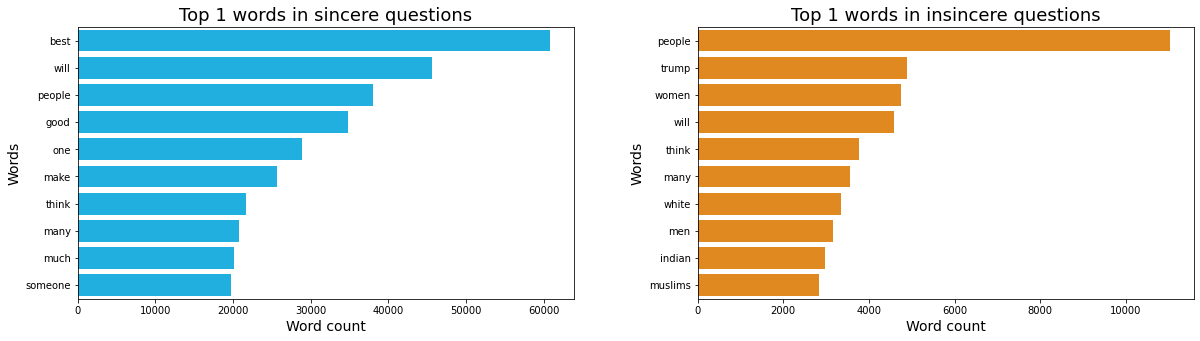

In [10]:
insincere_unigram_df = get_ngram_df(insincere_df['question_text'])
sincere_unigram_df = get_ngram_df(sincere_df['question_text'])

comparison_plot(sincere_unigram_df.head(10), insincere_unigram_df.head(10), 'word', 'wordcount', 0.25, 1)


####Bigram

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: generator 'ngrams' raised StopIteration
  # Remove the CWD from sys.path while we load stuff.


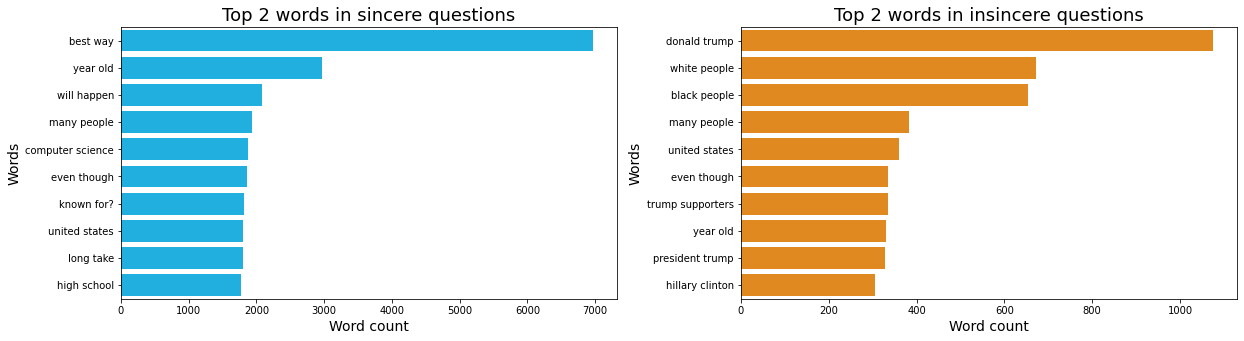

In [11]:
insincere_bigram_df = get_ngram_df(insincere_df['question_text'], 2)
sincere_bigram_df = get_ngram_df(sincere_df['question_text'], 2)

comparison_plot(sincere_bigram_df.head(10), insincere_bigram_df.head(10), 'word', 'wordcount', 0.25, 2)


####Trigram


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: generator 'ngrams' raised StopIteration
  # Remove the CWD from sys.path while we load stuff.


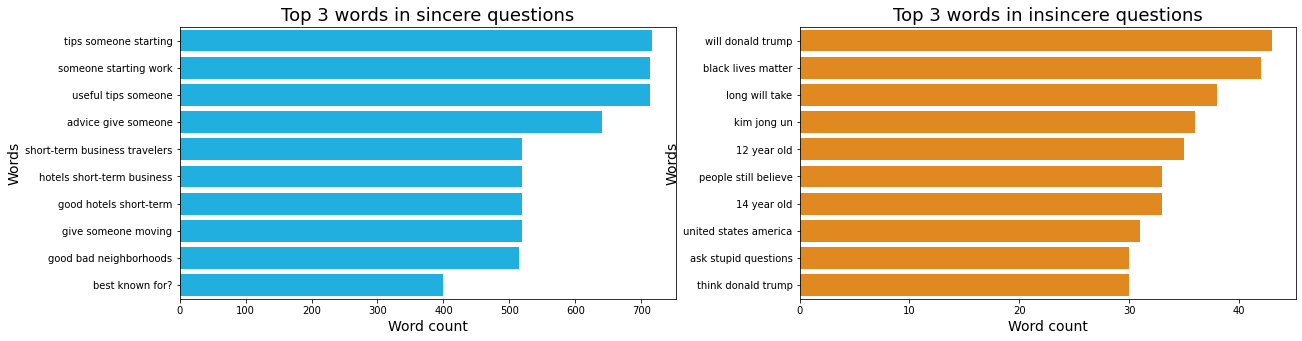

In [12]:
insincere_trigram_df = get_ngram_df(insincere_df['question_text'], 3)
sincere_trigram_df = get_ngram_df(sincere_df['question_text'], 3)

comparison_plot(sincere_trigram_df.head(10), insincere_trigram_df.head(10), 'word', 'wordcount', 0.25, 3)

##Word Cloud

####All Questions

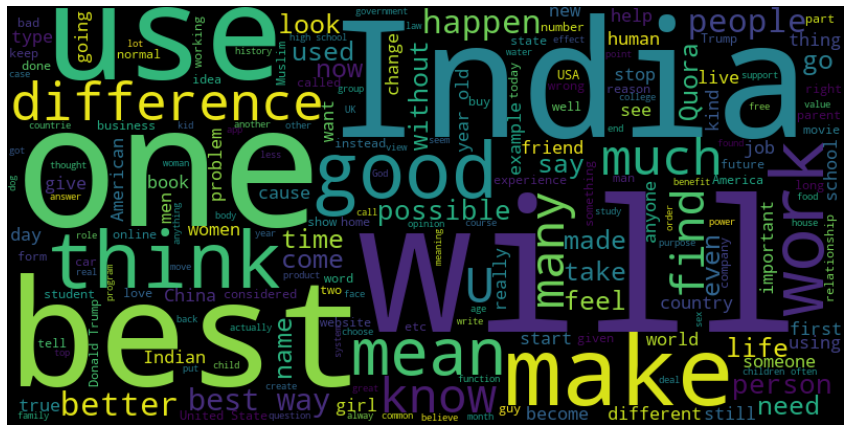

In [13]:
combined_text = train_df['question_text'].str.cat(sep=' ')
wordcloud = WordCloud(background_color='black', width=800, height=400, stopwords = set(STOPWORDS))
wordcloud.generate(combined_text)

# Display the generated image:
plt.figure(figsize=(15.0, 10.0))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####Sincere Questions

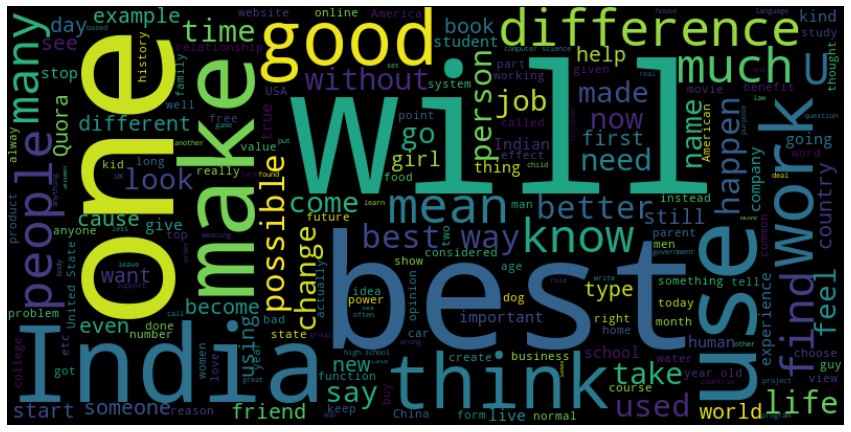

In [14]:
combined_text = sincere_df['question_text'].str.cat(sep=' ')
wordcloud = WordCloud(background_color='black', width=800, height=400, stopwords = set(STOPWORDS))
wordcloud.generate(combined_text)

# Display the generated image:
plt.figure(figsize=(15.0, 10.0))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####Insincere Questions

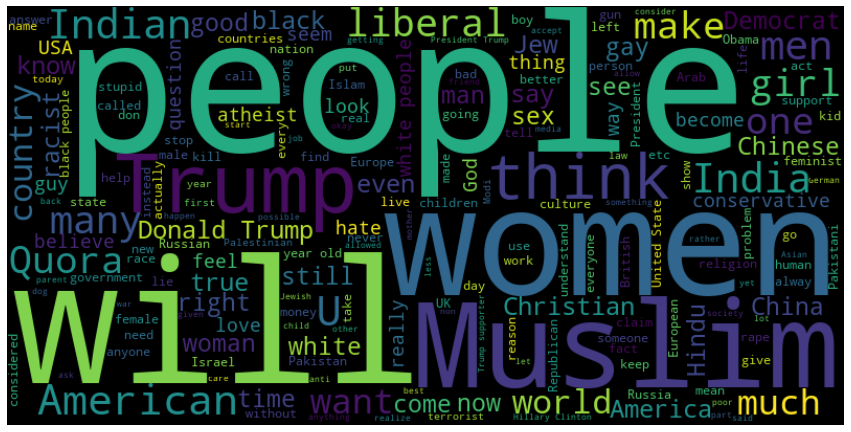

In [15]:
combined_text = insincere_df['question_text'].str.cat(sep=' ')
wordcloud = WordCloud(background_color='black', width=800, height=400, stopwords = set(STOPWORDS))
wordcloud.generate(combined_text)

# Display the generated image:
plt.figure(figsize=(15.0, 10.0))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Meta Features Exploration##
1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Average length of the words

In [0]:
## Number of words in the text ##
train_df["num_words"] = train_df["question_text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["question_text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_df["num_chars"] = train_df["question_text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_df["num_stopwords"] = train_df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
train_df["num_punctuations"] =train_df['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of upper case words in the text ##
train_df["num_words_upper"] = train_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

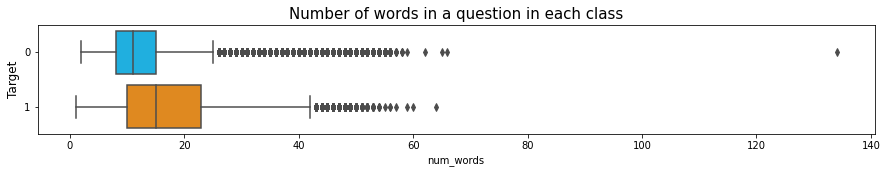

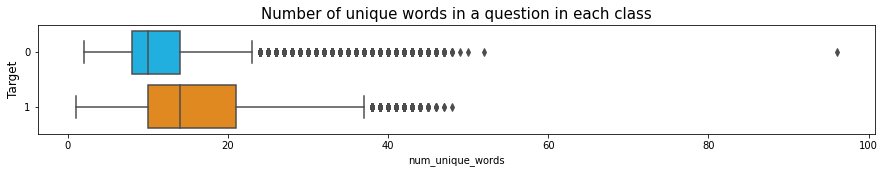

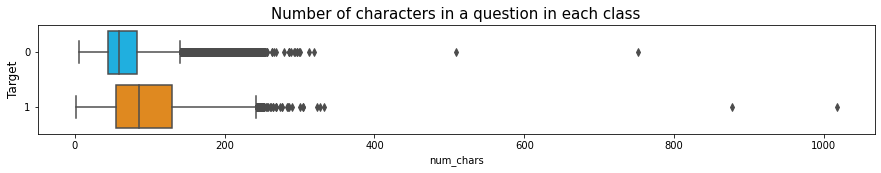

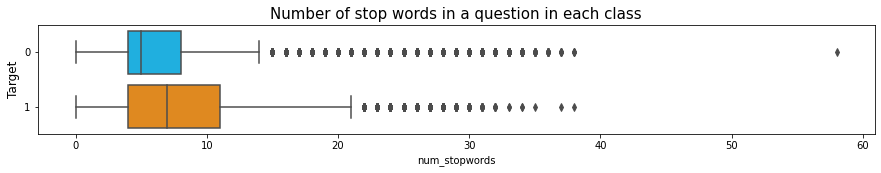

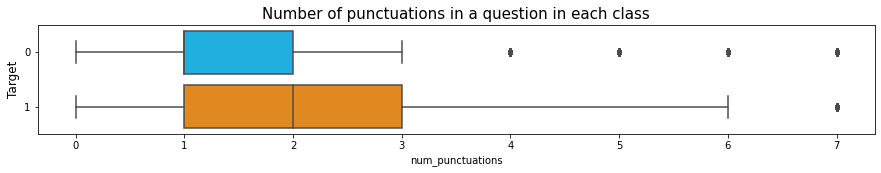

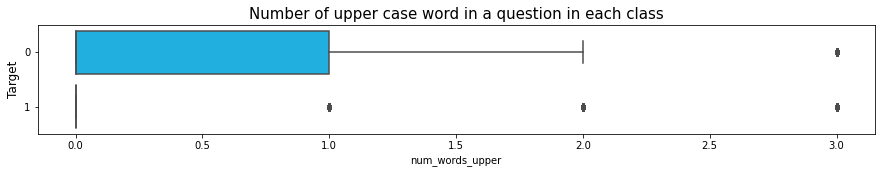

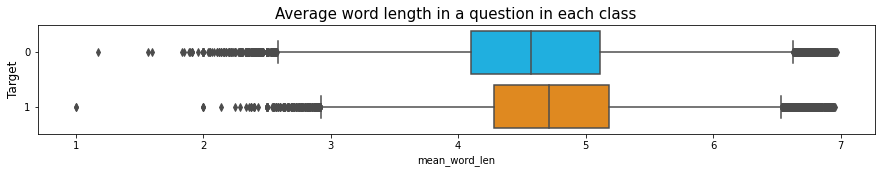

In [17]:
## Number of words in the text ##
fig, ax = plt.subplots(figsize=(15,2))
ax = sns.boxplot(x='num_words', y='target', data=train_df, orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of words in a question in each class", fontsize=15)

## Number of unique words in the text ##
fig, ax = plt.subplots(figsize=(15,2))
ax = sns.boxplot(x='num_unique_words', y='target', data=train_df, orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of unique words in a question in each class", fontsize=15)

## Number of characters in the text ##
fig, ax = plt.subplots(figsize=(15,2))
ax = sns.boxplot(x='num_chars', y='target', data=train_df, orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of characters in a question in each class", fontsize=15)

## Number of stopwords in the text ##
fig, ax = plt.subplots(figsize=(15,2))
ax = sns.boxplot(x='num_stopwords', y='target', data=train_df, orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of stop words in a question in each class", fontsize=15)

## Number of punctuations in the text ##
fig, ax = plt.subplots(figsize=(15,2))
ax = sns.boxplot(x='num_punctuations', y='target', data=train_df[train_df['num_punctuations']<train_df['num_punctuations'].quantile(.99)], orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of punctuations in a question in each class", fontsize=15)

## Number of upper case words in the text ##
fig, ax = plt.subplots(figsize=(15,2))
ax = sns.boxplot(x='num_words_upper', y='target', data=train_df[train_df['num_words_upper']<train_df['num_words_upper'].quantile(.99)], orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of upper case word in a question in each class", fontsize=15)

## Average length of the words in the text ##
fig, ax = plt.subplots(figsize=(15,2))
ax = sns.boxplot(x='mean_word_len', y='target', data=train_df[train_df['mean_word_len']<train_df['mean_word_len'].quantile(.99)], orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Average word length in a question in each class", fontsize=15)

plt.show()

#Word Embeddings


In [0]:
import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

##Word2Vec

In [18]:
word2vec_model = api.load('word2vec-google-news-300')

[=================================================-] 100.0% 1662.6/1662.8MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [19]:
word2vec_model.most_similar('barcelona')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('real_madrid', 0.7828749418258667),
 ('barca', 0.7812787294387817),
 ('madrid', 0.7679235935211182),
 ('drogba', 0.7621423602104187),
 ('man_utd', 0.7569426894187927),
 ('messi', 0.7537578344345093),
 ('ronaldinho', 0.7480927109718323),
 ('chelsea', 0.746387243270874),
 ('tottenham', 0.7456821799278259),
 ('liverpool', 0.7438541054725647)]

In [20]:
word2vec_model.most_similar('messi')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('drogba', 0.8152334094047546),
 ('ronaldo', 0.7879914045333862),
 ('ronaldinho', 0.7759474515914917),
 ('torres', 0.7755779027938843),
 ('pirlo', 0.7746129631996155),
 ('xavi', 0.7720139026641846),
 ('sneijder', 0.7672234177589417),
 ("eto'o", 0.7641000151634216),
 ('barca', 0.7615001201629639),
 ('gerrard', 0.7611674070358276)]

In [28]:
vector = word2vec_model['actor'] - word2vec_model['man'] + word2vec_model['woman']
word2vec_model.similar_by_vector(vector)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('actress', 0.8763542175292969),
 ('actor', 0.8711175918579102),
 ('actresses', 0.6629499197006226),
 ('thesp', 0.6566717624664307),
 ('Actress', 0.6258443593978882),
 ('actress_Rachel_Weisz', 0.6193411350250244),
 ('actors', 0.5909899473190308),
 ('comedian_Dom_DeLuise', 0.589963972568512),
 ('Actor', 0.5881482362747192),
 ('actress_Claire_Danes', 0.5856903791427612)]

In [0]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=0)

# words = ['good', 'bad', 'best', 'man', 'woman', 'test', 'boy', 'girl', 'USA', 'america', 'trump', 'donald']
# words_vector = np.array([word2vec_model[w] for w in words])

# Y = tsne.fit_transform(words_vector)
# plt.scatter(Y[:, 0], Y[:, 1])

# for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
#     plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
# plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

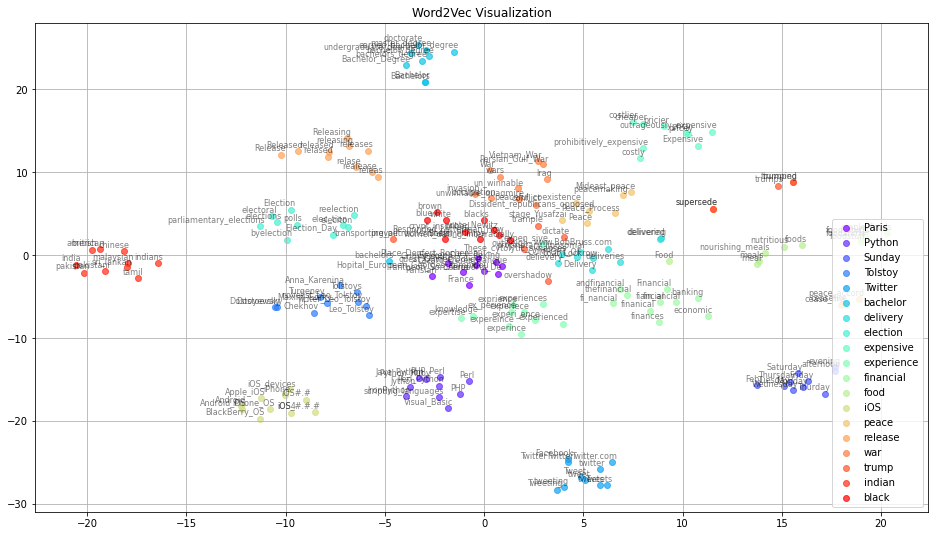

In [92]:

keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war', 'trump', 'indian', 'black']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec_model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(word2vec_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Word2Vec Visualization', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

##GLOVE

In [0]:
from os.path import exists
# if not exists('glove.840B.300d.zip'):
!wget -O glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip glove.840B.300d.zip

ERROR! Session/line number was not unique in database. History logging moved to new session 59
--2020-04-06 12:17:49--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... Read error (Connection reset by peer) in headers.
Retrying.

--2020-04-06 12:19:59--  (try: 2)  http://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 

In [96]:
!ls

drive		     sample_data	wiki-news-300d-1M.vec
glove.840B.300d.zip  similar_words.png	wiki-news-300d-1M.vec.zip


In [97]:
if not exists('glove.840B.300d.txt.word2vec'):
  glove_input_file = 'glove.840B.300d.txt'
  word2vec_output_file = 'glove.840B.300d.txt.word2vec'
  glove2word2vec(glove_input_file, word2vec_output_file)

glove_model = KeyedVectors.load_word2vec_format('glove.840B.300d.txt.word2vec', binary=False)

FileNotFoundError: ignored

In [0]:
glove_model.most_similar('man')

##FastText


In [22]:
if not exists('wiki-news-300d-1M.vec.zip'):
  !wget -O wiki-news-300d-1M.vec.zip https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
  !unzip wiki-news-300d-1M.vec.zip

--2020-04-06 10:41:10--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4a8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  35.3MB/s    in 18s     

2020-04-06 10:41:29 (35.4 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [25]:
fasttext_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [26]:
fasttext_model.most_similar('thai')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Thai', 0.709956169128418),
 ('thailand', 0.662773609161377),
 ('muay', 0.6529220938682556),
 ('farang', 0.6480675935745239),
 ('thais', 0.6478999853134155),
 ('bangkok', 0.6262693405151367),
 ('Isaan', 0.6214834451675415),
 ('siam', 0.614883542060852),
 ('khao', 0.6121606230735779),
 ('farangs', 0.6108036637306213)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

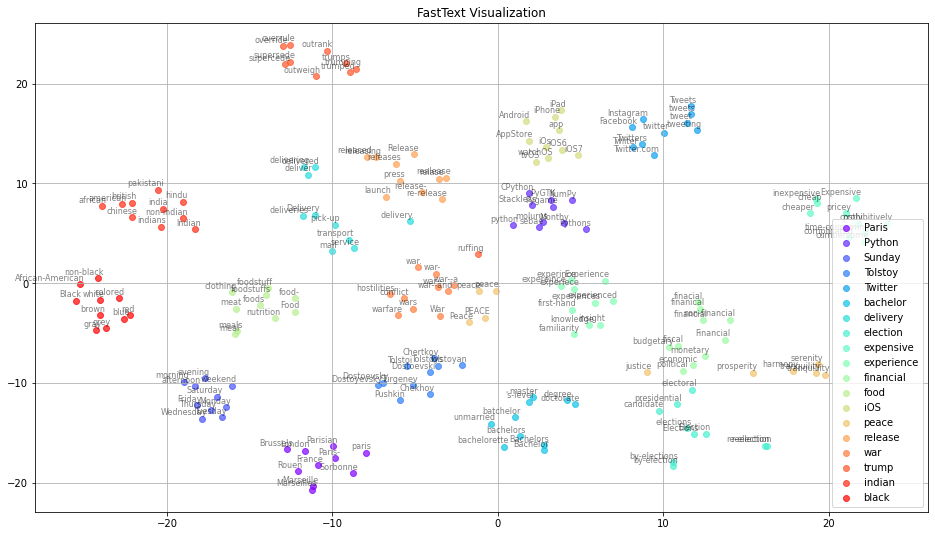

In [94]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war', 'trump', 'indian', 'black']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in fasttext_model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(fasttext_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('FastText Visualization', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')